In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# LOADING DATA SET


In [15]:
df=pd.read_csv(r"C:\Users\EZEAMII CHIOMA\Downloads\capstone - capstone.csv")

# DATA CLEANING

In [17]:
df

,show_id,Type,title,director,Country,date added,rating,duration,listed_in
0,s1,Movie,DICK jOHNSON IS deAD,Kirsten Johnson,United States,9/25/2021,PG-13,90 min,Documentaries
1,s3,TV Show,GANGLANdS,Julien Leclercq,France,(9/24/2021),TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,MIDNIgHT MASS,Mike Flanagan,United States,(9/24/2021),TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,COnfESsIoNs OF AN INVISIBLE GIRL,Bruno Garotti,Brazil,9/22/2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,sANKOFa,Haile Gerima,Us,9/24/2021,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,YuNUs eMRE,Not Given,Turkey,1/17/2017,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,zAK sTorm,Not Given,United States,9/13/2018,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,ziNdAGi gULZAR haI,Not Given,Pakistan,12/15/2016,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,yOKO,Not Given,Pakistan,6/23/2018,TV-Y,1 Season,Kids' TV


In [18]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of      show_id     Type                             title         director  \
0         s1    Movie              DICK jOHNSON IS deAD  Kirsten Johnson   
1         s3  TV Show                         GANGLANdS  Julien Leclercq   
2         s6  TV Show                     MIDNIgHT MASS    Mike Flanagan   
3        s14    Movie  COnfESsIoNs OF AN INVISIBLE GIRL    Bruno Garotti   
4         s8    Movie                           sANKOFa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        YuNUs eMRE        Not Given   
8786   s8798  TV Show                         zAK sTorm        Not Given   
8787   s8801  TV Show                ziNdAGi gULZAR haI        Not Given   
8788   s8784  TV Show                              yOKO        Not Given   
8789   s8786  TV Show                               YoM        Not Given   

            Country   date added rating   du

In [19]:
df=df.drop(columns ="title")

# CLEANING DATE COLUMN AND YEAR EXTRACTION


In [20]:
date_formats = ["(%m/%d/%Y)", "%m/%d/%Y", "%m/%d/%Y", "%m/%d/%Y"]

In [21]:
df['date added'] = df['date added'].str.replace(r"\(|\)", "", regex=True)

In [22]:
for date_format in date_formats:
    df['parsed_date'] = pd.to_datetime(df['date added'], format=date_format, errors='coerce')

In [23]:
df['year_added'] = df['parsed_date'].dt.year

In [28]:
# number of days from release to today
from datetime import datetime
today = datetime.today()
df['date added'] = pd.to_datetime(df['date added'])
df['date added'] = (today - df['date added']).dt.days

# CLEANING DIRECTORS,MOVIE TYPE AND COUNTRY COLUMN 

In [ ]:
#cleaning directors column
df["director"]=df["director"].str.strip()
#cleaning Country column
df["Country"]=df["Country"].str.strip()
#cleaning Type column
df["Type"]=df["Type"].str.strip()

In [216]:
df['Country'] = df['Country'].str.title()

In [217]:
df['director'] = df['director'].str.title()

In [218]:
df['Type'] = df['Type'].str.title()

In [220]:
country_mapping = {
    'us': 'united states',
    'ca': 'Canada',
    'uk': 'United Kingdom',
    'jp': 'Japan',
    'pk': 'Pakistan',
    'united state': 'united states',
    'nited states': 'united states',  # Explicitly include 'nited states'
    'uae': 'United Arab Emirates',
}

df['Country'] = df['Country'].replace(country_mapping)


In [221]:
print(df['Country'].unique())


['United States' 'France' 'Brazil' 'United Kingdom' 'India' 'Germany'
 'Pakistan' 'Not Given' 'China' 'South Africa' 'Japan' 'Nigeria' 'Spain'
 'Philippines' 'Australia' 'Argentina' 'Canada' 'Hong Kong' 'Italy'
 'New Zealand' 'Egypt' 'Colombia' 'Mexico' 'Belgium' 'Switzerland'
 'Argentin' 'Taiwan' 'Bulgaria' 'Poland' 'South Korea' 'Saudi Arabia'
 'Thailand' 'Indonesia' 'Kuwait' 'Malaysia' 'Vietnam' 'Lebanon' 'Romania'
 'Syria' 'United Arab Emirates' 'Sweden' 'Mauritius' 'Austria' 'Turkey'
 'Czech Republic' 'Cameroon' 'Netherlands' 'Ireland' 'Russia' 'Kenya'
 'Chile' 'Uruguay' 'Bangladesh' 'Portugal' 'Hungary' 'Norway' 'Singapore'
 'Iceland' 'Serbia' 'Namibia' 'Peru' 'Mozambique' 'Ghana' 'Zimbabwe'
 'Israel' 'Finland' 'Denmark' 'Paraguay' 'Cambodia' 'Georgia'
 'Soviet Union' 'Greece' 'West Germany' 'Iran' 'Venezuela' 'Slovenia'
 'Guatemala' 'Jamaica' 'Somalia' 'Croatia' 'Jordan' 'Luxembourg' 'Senegal'
 'Belarus' 'Puerto Rico' 'Cyprus' 'Ukraine']


In [215]:
df['Country'] = df['Country'].replace(country_mapping)


In [202]:
df['Country'] = df['Country'].replace('nited State')


In [223]:
corrections = {
    'Mvie': 'Movie',
    'Tv': 'TV Show',
    'Tvs': 'TV Show',
    'Mvi': 'Movie',
    'Mv': 'Movie',
    'TVS': 'TV Show',
    'tv': 'TV Show',
    'm': 'Movie',
    'MvE': 'Movie',
    'M': 'Movie',
    'Mve': 'Movie'
}

df['Type'] = df['Type'].replace(corrections)


In [169]:
country_mapping2 = {
    'UEA': 'United Arab Emirates',
    'ITL': 'Italy',
    'ID': 'India',
    'HK': 'Hong Kong'
    
}

In [170]:
df['Country'] = df['Country'].replace(country_mapping2)


In [171]:
df['Country'] = df['Country'].replace('thailan', 'Thailand')



# SPLITTING LISTED_IN COLUMN 

In [55]:
df = df.join(df['listed_in'].str.split(', ', expand=True).add_prefix('genre_'))
df = df.drop(columns=['listed_in'])

In [84]:
df

,show_id,Type,director,Country,date added,rating,duration,parsed_date,year_added,genre_0,genre_1,genre_2
0,s1,Movie,Kirsten Johnson,United States,753,PG-13,90 min,2021-09-25,2021,Documentaries,None,None
1,s3,TV Show,Julien Leclercq,France,754,TV-MA,1 Season,2021-09-24,2021,Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Mike Flanagan,United States,754,TV-MA,1 Season,2021-09-24,2021,TV Dramas,TV Horror,TV Mysteries
3,s14,Movie,Bruno Garotti,Brazil,756,TV-PG,91 min,2021-09-22,2021,Children & Family Movies,Comedies,None
4,s8,Movie,Haile Gerima,United States,754,TV-MA,125 min,2021-09-24,2021,Dramas,Independent Movies,International Movies
...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Not Given,Turkey,2465,TV-PG,2 Seasons,2017-01-17,2017,International TV Shows,TV Dramas,None
8786,s8798,TV Show,Not Given,United States,1861,TV-Y7,3 Seasons,2018-09-13,2018,Kids' TV,None,None
8787,s8801,TV Show,Not Given,Pakistan,2498,TV-PG,1 Season,2016-12-15,2016,International TV Shows,Romantic TV Shows,TV Dramas
8788,s8784,TV Show,Not Given,Pakistan,1943,TV-Y,1 Season,2018-06-23,2018,Kids' TV,None,None


# RANDOM RATING FUNCTION

In [232]:
# Generate random ratings for each movie
min_rating = 1.0  # Minimum rating
max_rating = 5.0  # Maximum rating
num_decimals = 2  # Number of decimal places



# SPLIT DURATION FUNCTION

In [233]:
def split_duration(df):
    df['tv_series_duration'] = df['duration'][df['type'] == 'TV Show']
    df['duration'] = df['duration'].apply(lambda x: x if not x.isdigit() else None)
    split_duration(df)
    df = df.join(df['duration'].str.split(' ', expand=True).add_prefix('duration_'))



# TV SERIES DURATION IN SEPAREATE COLUMN 

In [234]:

def separate_tv_series_duration(df):
    df['tv_series_duration'] = ""
    tv_series_rows = df[df['Type'] == 'TV Show']
    df.loc[tv_series_rows.index, 'tv_series_duration'] = tv_series_rows['duration']
    df.loc[tv_series_rows.index, 'duration'] = ""
    return df



In [235]:
df = separate_tv_series_duration(df)


In [103]:
df

,show_id,Type,director,Country,date added,rating,duration,parsed_date,year_added,genre_0,genre_1,genre_2,tv_series_duration
0,s1,Movie,Kirsten Johnson,United States,753,PG-13,90 min,2021-09-25,2021,Documentaries,None,None,
1,s3,TV Show,Julien Leclercq,France,754,TV-MA,,2021-09-24,2021,Crime TV Shows,International TV Shows,TV Action & Adventure,1 Season
2,s6,TV Show,Mike Flanagan,United States,754,TV-MA,,2021-09-24,2021,TV Dramas,TV Horror,TV Mysteries,1 Season
3,s14,Movie,Bruno Garotti,Brazil,756,TV-PG,91 min,2021-09-22,2021,Children & Family Movies,Comedies,None,
4,s8,Movie,Haile Gerima,United States,754,TV-MA,125 min,2021-09-24,2021,Dramas,Independent Movies,International Movies,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Not Given,Turkey,2465,TV-PG,,2017-01-17,2017,International TV Shows,TV Dramas,None,2 Seasons
8786,s8798,TV Show,Not Given,United States,1861,TV-Y7,,2018-09-13,2018,Kids' TV,None,None,3 Seasons
8787,s8801,TV Show,Not Given,Pakistan,2498,TV-PG,,2016-12-15,2016,International TV Shows,Romantic TV Shows,TV Dramas,1 Season
8788,s8784,TV Show,Not Given,Pakistan,1943,TV-Y,,2018-06-23,2018,Kids' TV,None,None,1 Season


# THE MOST COMMON GENRE

In [236]:
from collections import Counter

all_genres = df[['genre_0', 'genre_1', 'genre_2']].stack().str.strip().tolist()

genre_counts = Counter(all_genres)

most_common_genre, count = genre_counts.most_common(1)[0]

print("The most common genre is:", most_common_genre)
print("Count:", count)


The most common genre is: International Movies
Count: 2752


# THE MOST POPULAR DIRECTOR

In [237]:
from collections import Counter

all_directors = df['director'].str.strip().tolist()

director_counts = Counter(all_directors)

most_popular_director, count = director_counts.most_common(1)[0]

print("The most popular director is:", most_popular_director)
print("Count:", count)


The most popular director is: Not Given
Count: 2588


In [238]:

most_popular_director, count = director_counts.most_common(1)[0]

second_most_popular_director, second_count = director_counts.most_common(2)[1]

print("The most popular director is:", second_most_popular_director)
print("Count:", second_count)


The most popular director is: Rajiv Chilaka
Count: 20


# DATA VISUALIZATION


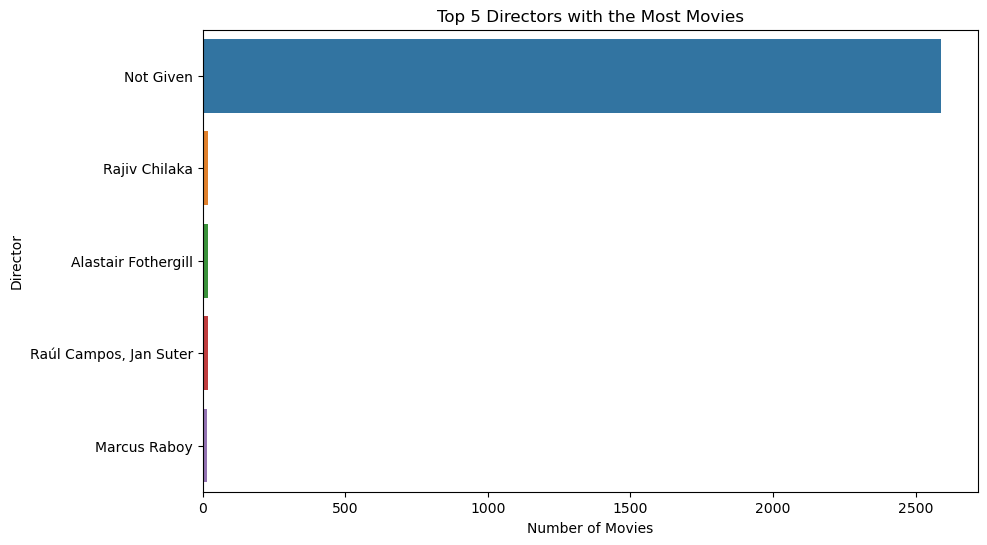

In [225]:
#Most Popular Director
director_counts = df['director'].value_counts()[:5]
plt.figure(figsize=(10, 6))
sns.barplot(x=director_counts.values, y=director_counts.index)
plt.title("Top 5 Directors with the Most Movies")
plt.xlabel("Number of Movies")
plt.ylabel("Director")
plt.show()

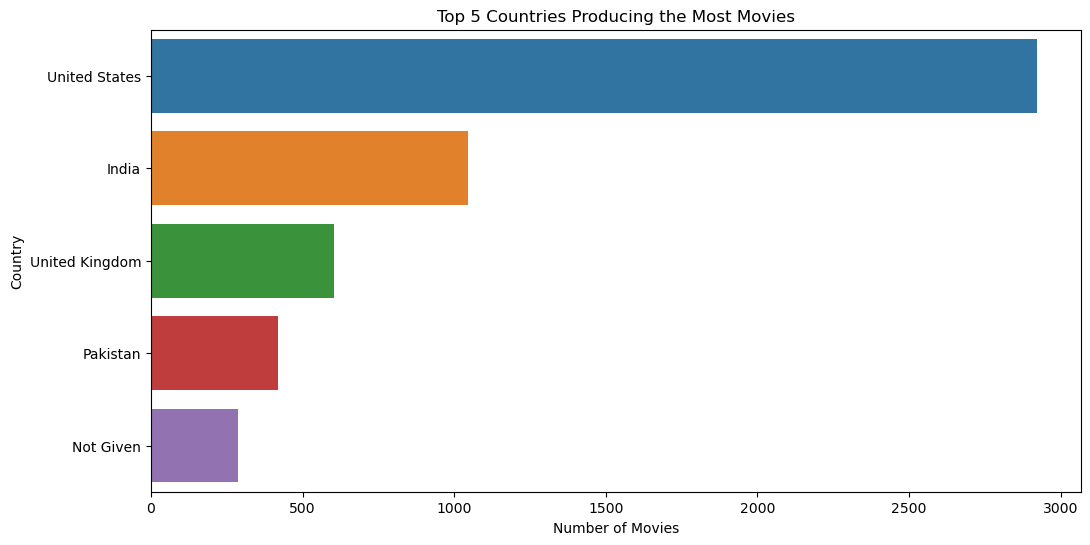

In [129]:
#  Countries that Make the Most Movies
country_counts = df['Country'].value_counts()
top_countries = country_counts.head(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 5 Countries Producing the Most Movies")
plt.xlabel("Number of Movies")
plt.ylabel("Country")
plt.show()


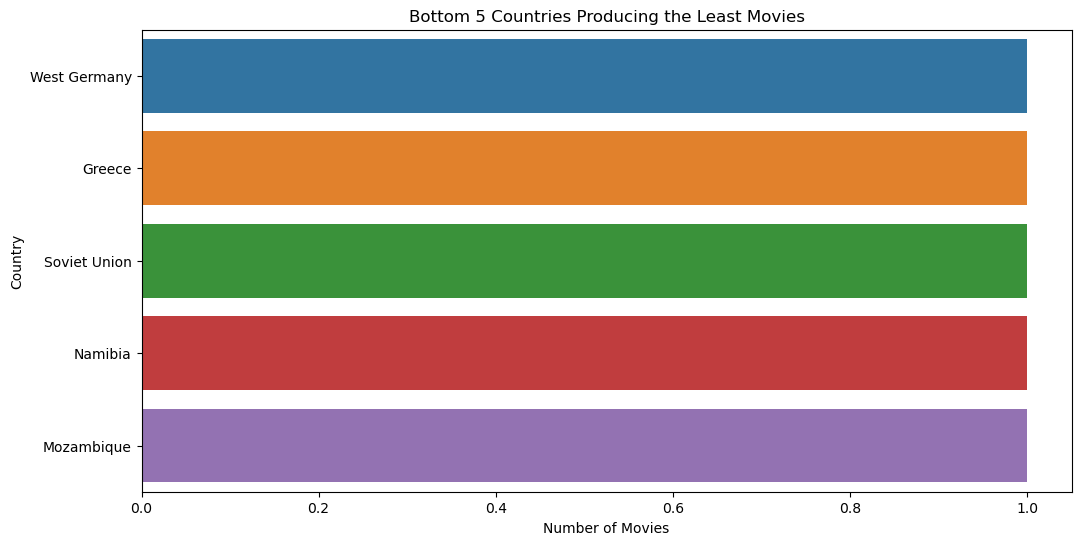

In [227]:
# Bottom 5 Countries Producing the Least Movies                      
country_counts = df['Country'].value_counts()
bottom_countries = country_counts.tail(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_countries.values, y=bottom_countries.index)
plt.title("Bottom 5 Countries Producing the Least Movies")
plt.xlabel("Number of Movies")
plt.ylabel("Country")
plt.show()


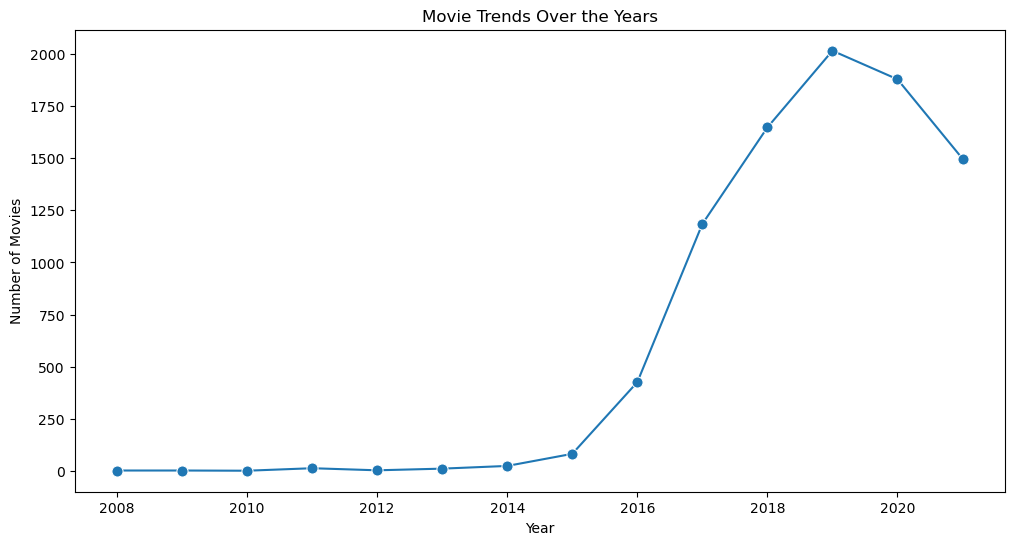

In [266]:
# Movie Trends Over the Years
year_counts = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o", markersize=8)
plt.title("Movie Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()



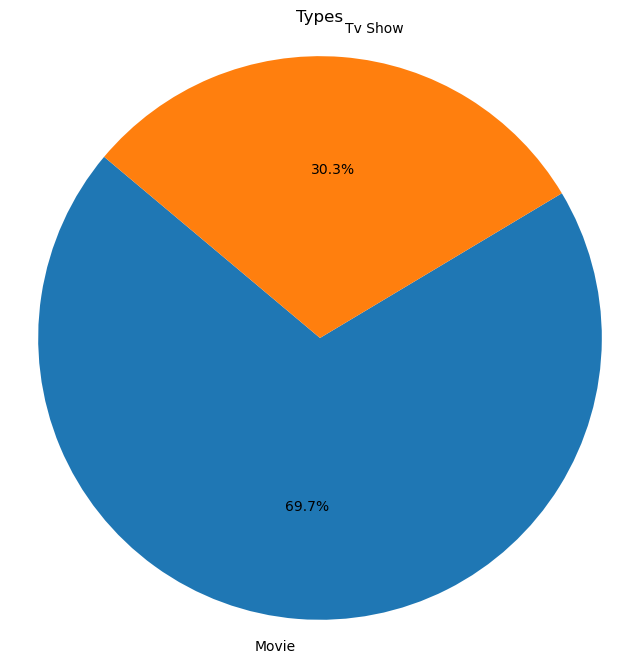

In [230]:
#Types  
type_counts = df['Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Types')
plt.axis('equal')
plt.show()


In [229]:
df['Type'] = df['Type'].str.strip()
unique values in the 'Type' column again
print(df['Type'].unique())


['Movie' 'Tv Show']


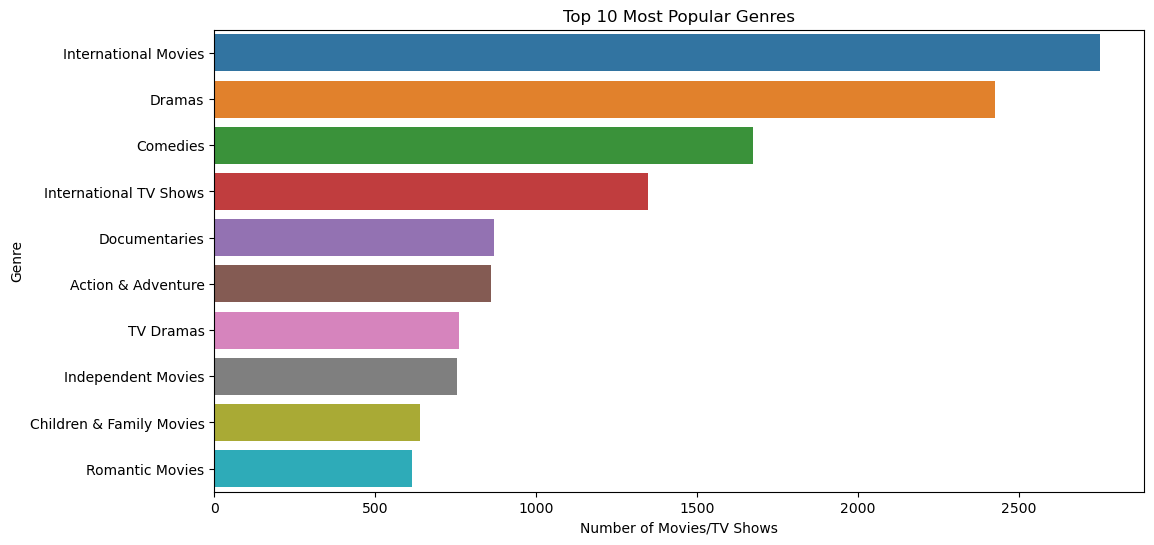

In [247]:
#Top 10 Most Popular Genres
genre_counts = df[['genre_0', 'genre_1', 'genre_2']].stack().value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Top 10 Most Popular Genres")
plt.xlabel("Number of Movies/TV Shows")
plt.ylabel("Genre")
plt.show()



<Figure size 1200x1200 with 0 Axes>

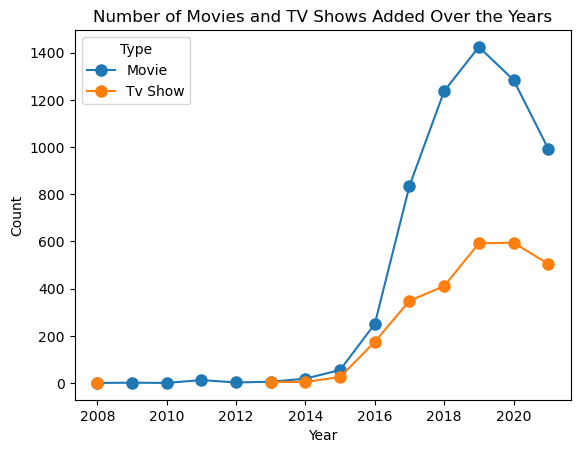

In [272]:
#Number of Movies and TV Shows Added Over the Years
df['parsed_year'] = df['parsed_date'].dt.year
yearly_counts = df.groupby(['parsed_year', 'Type']).size().unstack()
plt.figure(figsize=(12, 12))
yearly_counts.plot(kind='line', marker='o', markersize=8)
plt.title("Number of Movies and TV Shows Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Type", loc="upper left")
plt.show()
